In [56]:
import cv2
import pickle
from scipy.misc import imread
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto(
    gpu_options=tf.GPUOptions(
        visible_device_list="0",
        allow_growth=True
    )
)
set_session(tf.Session(config=config))

In [60]:
path_prefix = '/data/jun/dataset/'
depth_gt = pickle.load(open('../pkls/SUNRGBD/Depth_v8.pkl', 'rb'))
rgb_gt = pickle.load(open('../pkls/SUNRGBD/RGB_v8.pkl', 'rb'))
depth_keys = sorted(depth_gt.keys())
depth_img_path = path_prefix + depth_keys[20]
depth_img = imread(depth_img_path).astype('float32')

rgb_keys = sorted(rgb_gt.keys())
rgb_img_path = path_prefix + rgb_keys[20]
rgb_img = imread(rgb_img_path).astype('float32')
backtorgb = cv2.cvtColor(depth_img,cv2.COLOR_GRAY2RGB)

/home/jun/.virtualenvs/rgbd-ssd/lib/python3.4/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/home/jun/.virtualenvs/rgbd-ssd/lib/python3.4/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [61]:
# hha_img = imread("/data/jun/dataset/SUNRGBD/realsense/lg/2014_10_24-09_15_20-1311000073/depth/0000063.png").astype('float32')
# plt.imshow(hha_img)
# plt.show()

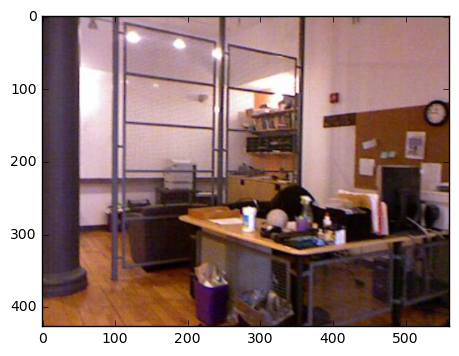

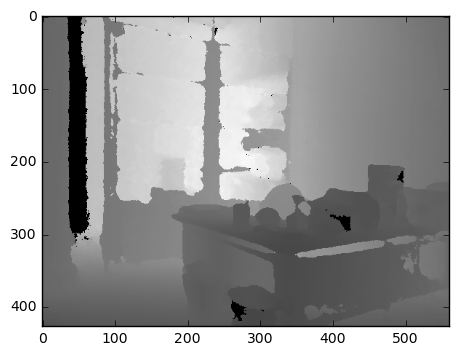

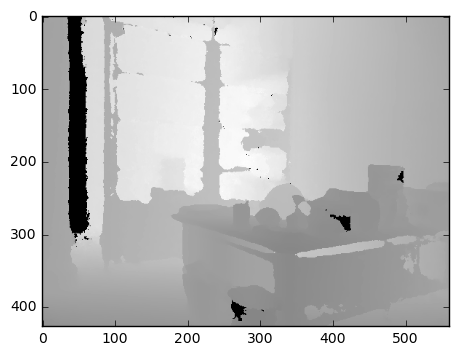

In [65]:
plt.imshow(rgb_img/255.)
#plt.title("Original Image")
plt.show()
plt.imsave('./images/original_rgb.png', rgb_img/255.0)

plt.imshow(depth_img, cmap = 'gray')

plt.show()
plt.imsave('./images/original_depth.png', depth_img, cmap = 'gray')
#plt.title("Original")

converted_img = depth_img / np.max(depth_img)
converted_img = np.sqrt(converted_img)
converted_img = np.array(converted_img*256, dtype=int)
plt.imshow(converted_img, cmap = 'gray')

plt.show()
plt.imsave('./images/converted_depth.png', converted_img, cmap = 'gray')
#plt.title("converted image")

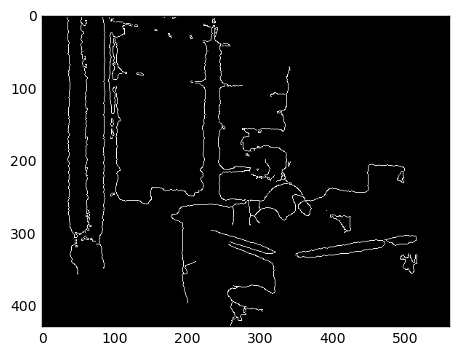

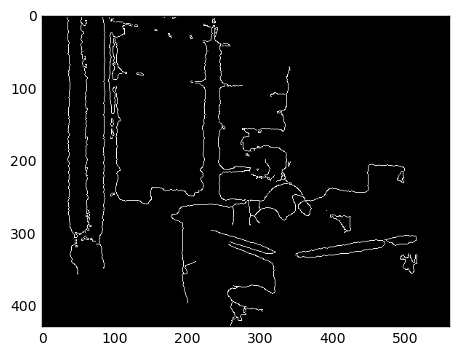

In [66]:
cannyed_img = np.uint8(converted_img)
cannyed_img = cv2.Canny(cannyed_img, 20, 130)
plt.imshow(cannyed_img, cmap = 'gray')
#plt.title("Canny Edge Filter")
plt.show()
plt.imsave('./images/canny_edge.png', cannyed_img, cmap = 'gray')

bilateraled_img = cv2.bilateralFilter(cannyed_img, d=5, sigmaColor=5, sigmaSpace=2)
plt.imshow(bilateraled_img, cmap='gray')
#plt.title("Canny Edge Filter and Bilateral Filter")
plt.show()
plt.imsave('./images/bilateral.png', bilateraled_img, cmap = 'gray')


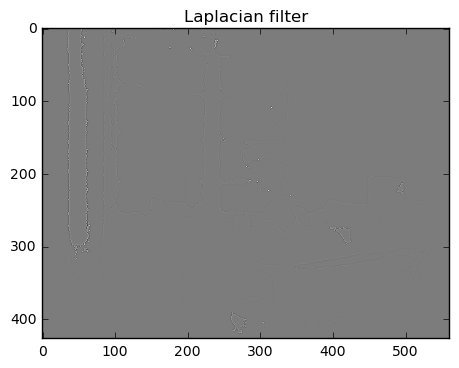

In [51]:
laplacianed_img = np.uint8(converted_img)
laplacianed_img = cv2.Laplacian(laplacianed_img, cv2.CV_64F)
plt.imshow(laplacianed_img, cmap = 'gray')
plt.title("Laplacian filter")
plt.show()

In [67]:
def hole_filling(img, kernel=3):
    N, M = img.shape
    for i in range(N):
        for j in range(M):
            if img[i, j] == 0:
                neighbour = img[max(int((i-(kernel-1)/2)), 0):min(int((i+(kernel-1)/2)), N), max(int((j-(kernel-1)/2)),0):min(int((j+(kernel-1)/2)), M)]
                if len(neighbour) == 0:
                    continue
                else:
                    max_val = np.amax(neighbour)
                    img[i, j] = max_val
    return img


In [68]:
img_list = []
filled_img = hole_filling(converted_img)

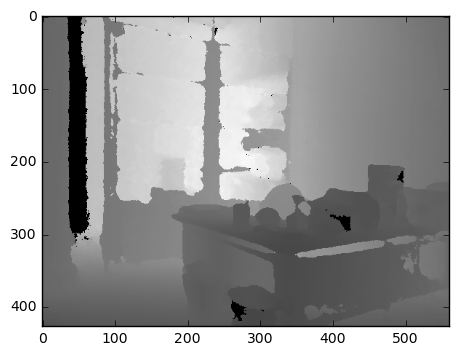

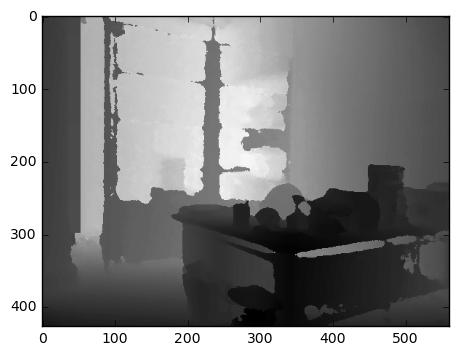

In [71]:
plt.imshow(depth_img, cmap='gray')
#plt.title('Original Image')
plt.show()

plt.imshow(filled_img, cmap = 'gray')
#plt.title('Hole filled image')
plt.show()
plt.imsave('./images/hole_filled.png', filled_img, cmap = 'gray')

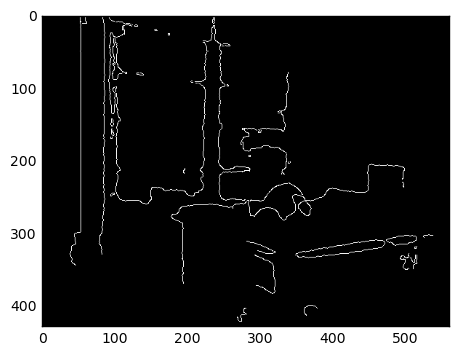

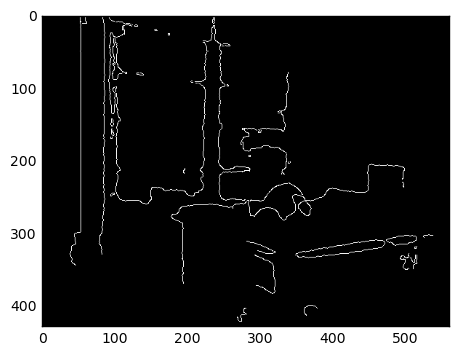

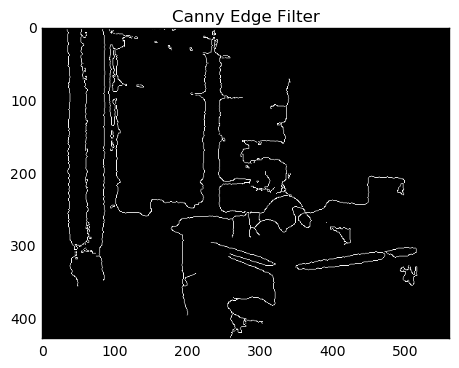

In [70]:
cannyed_filled_img = np.uint8(filled_img)
cannyed_filled_img = cv2.Canny(cannyed_filled_img, 70, 110)
plt.imshow(cannyed_filled_img, cmap = 'gray')
#plt.title("Canny Edge Filter with filled Image")
plt.show()
plt.imsave('./images/canny_hole_filled.png', cannyed_filled_img, cmap = 'gray')

bilateraled_filled_img = cv2.bilateralFilter(cannyed_filled_img, d=5, sigmaColor=5, sigmaSpace=2)
plt.imshow(bilateraled_filled_img, cmap='gray')
#plt.title("Canny Edge Filter and Bilateral Filter")
plt.show()
plt.imsave('./images/canny_bilateral_hole_filled.png', bilateraled_filled_img, cmap = 'gray')

plt.imshow(cannyed_img, cmap = 'gray')
plt.title("Canny Edge Filter")
plt.show()


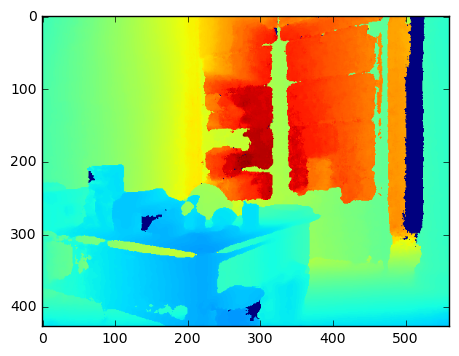

In [14]:
plt.imshow(preprocess_input(depth_img))
plt.show()